# **EXP 3 Convolutional Deep Neural Network for Digit Classification**
# **NAME: DEEPIKA S**
# **REGISTER NUMBER: 2122222230028**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

DEEPIKA S


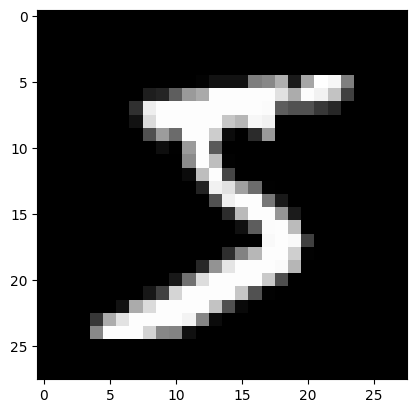

In [ ]:
plt.imshow(single_image,cmap='gray')
print("DEEPIKA S")

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
 type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

In [ ]:
single_image = X_train[500]

DEEPIKA S


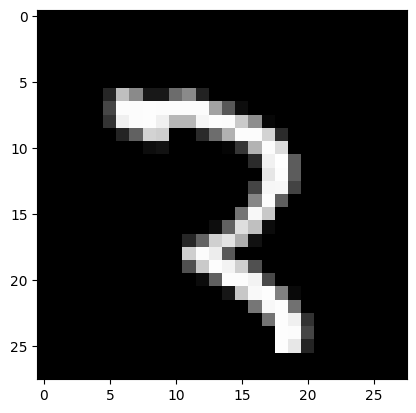

In [ ]:
plt.imshow(single_image,cmap='gray')
print("DEEPIKA S")

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
Name: DEEPIKA S

Register Number: 212222230028

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,906 (1.33 MB)

 Trainable params: 348,906 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8720 - loss: 0.4388 - val_accuracy: 0.9737 - val_loss: 0.0789
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9771 - val_loss: 0.0737
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9842 - loss: 0.0490 - val_accuracy: 0.9839 - val_loss: 0.0511
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9817 - val_loss: 0.0603
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9855 - val_loss: 0.0488


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.936217,0.217020,0.9737,0.078866
1,0.978600,0.070761,0.9771,0.073650
2,0.984717,0.048118,0.9839,0.051133
3,0.989150,0.035299,0.9817,0.060310
4,0.991083,0.027839,0.9855,0.048839


DEEPIKA S


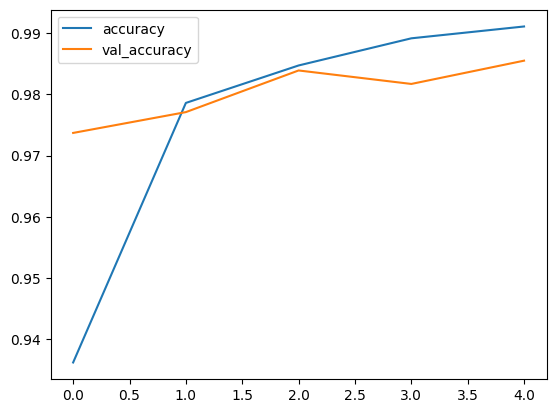

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
print("DEEPIKA S")

DEEPIKA S


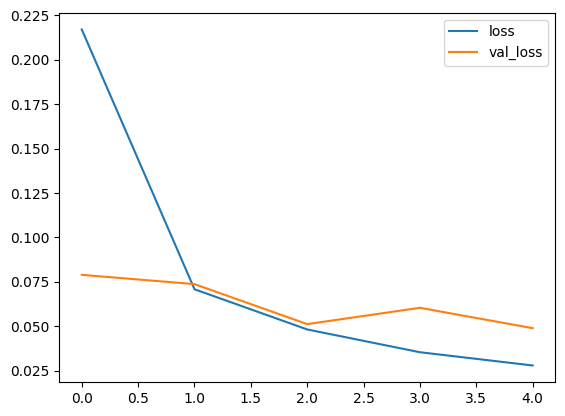

In [ ]:
metrics[['loss','val_loss']].plot()
print("DEEPIKA S")

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))
print('\nDEEPIKA S')


[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   7    3 1008    0    3    0    2    5    2    2]
 [   1    0    5  990    0    7    0    3    2    2]
 [   1    1    0    0  971    0    0    0    1    8]
 [   2    0    1    4    0  878    4    0    3    0]
 [   9    3    1    0    3    3  938    0    1    0]
 [   1    1    5    0    0    0    0 1017    2    2]
 [   7    0    2    0    0    0    1    1  962    1]
 [   5    3    0    1    5    5    0    8    3  979]]

DEEPIKA S


In [ ]:
print('DEEPIKA S\n')
print(classification_report(y_test,x_test_predictions))

DEEPIKA S

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('imagenine.jpeg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('imagenine.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print('DEEPIKA S\n')
print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
DEEPIKA S

[9]


In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("DEEPIKA S")

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
    axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
print("DEEPIKA S\n")
print(x_single_prediction)

DEEPIKA S

[9]
